In [1]:
import pandas as pd
import os

#### Merging 12 months of sales data into a singe file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
files = [file for file in os.listdir("./Sales_Data/")]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data = all_months_data

#### Clean the data

In [6]:
nan_df = data[data.isna().any(axis=1)]
data = data.dropna(how='all')

In [7]:
# Find 'Or' in date
data[data['Order Date'].str[0:2] == "Or"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# Get rid of the above
data = data[data['Order Date'].str[0:2] != "Or"]

In [9]:
# Convert columns to the correct type
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Order Date'] = pd.to_datetime(data['Order Date']) # This takes a bit of time without explicit format

#### Introduce additional columns

In [10]:
# Add amount column
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

def get_city(address):
    return address.split(',')[1][1:]

def get_state(address):
    return address.split(',')[2][1:3]

# Add city column
data['City'] = data['Purchase Address'].apply(lambda x: get_city(x) + " " + get_state(x))
# data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") # same but using f-string
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles CA


#### Q1: What was the best month of sales and what was the amount?

In [11]:
grp = data.groupby(data['Order Date'].dt.month).sum()
grp

,Quantity Ordered,Price Each,Sales
Order Date,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


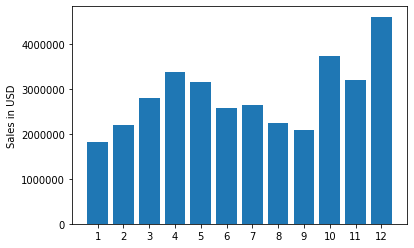

In [12]:
import matplotlib.pyplot as plt

plt.bar(grp.index, grp['Sales'])
plt.xticks(grp.index)
plt.ylabel('Sales in USD')
plt.show()

#### Q2: What city had the highest number of sales?

In [13]:
r = data.groupby('City')['Sales'].sum()
print(r)
r.idxmax()

City
Atlanta GA          2.795499e+06
Austin TX           1.819582e+06
Boston MA           3.661642e+06
Dallas TX           2.767975e+06
Los Angeles CA      5.452571e+06
New York City NY    4.664317e+06
Portland ME         4.497583e+05
Portland OR         1.870732e+06
San Francisco CA    8.262204e+06
Seattle WA          2.747755e+06
Name: Sales, dtype: float64


'San Francisco CA'

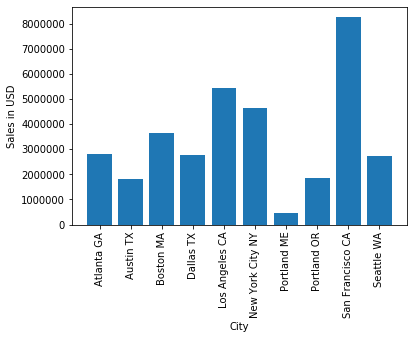

In [15]:
plt.bar(r.index, r)
plt.xticks(r.index, rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

#### Q3: What time time of day attracts the most sales?

In [16]:
data.dtypes
# we have previously converted 'Order Date' to timestamp, so we can proceed

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Sales                      float64
City                        object
dtype: object

In [17]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston MA,22,30


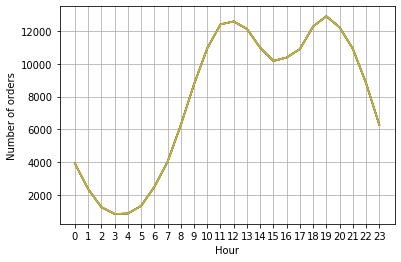

In [18]:
hours = [hour for hour, df, in data.groupby('Hour')]

plt.plot(hours, data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

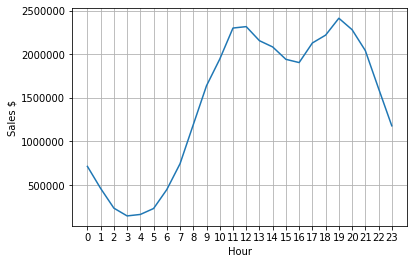

In [19]:
# Let's do the same with actual sales summary

plt.plot(hours, data.groupby('Hour')['Sales'].sum())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales $')
plt.grid()
plt.show()

#### Q4: What products are most often sold together?

In [20]:
# Need to group by ['Order date', 'Purchase address']
r = data.groupby(['Order Date', 'Purchase Address'])
r.head()
# We also see that such orders go with the same order ID, so we could go this route.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles CA,9,27
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,Los Angeles CA,20,56
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,San Francisco CA,16,0
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,San Francisco CA,7,39
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,San Francisco CA,17,30


In [21]:
df = data[data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [22]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Q5: What product sold the most?

In [23]:
groups = data.groupby('Product')['Quantity Ordered'].sum()
groups.idxmax()

'AAA Batteries (4-pack)'

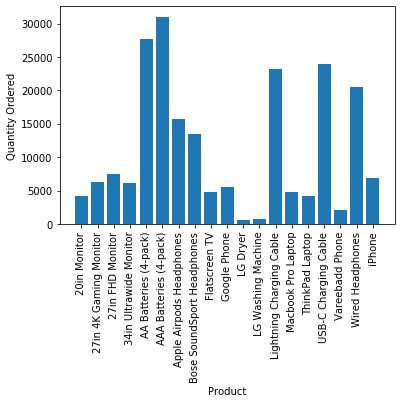

In [24]:
plt.bar(groups.index, groups)
plt.xticks(groups.index, rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

In [25]:
prices = data.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

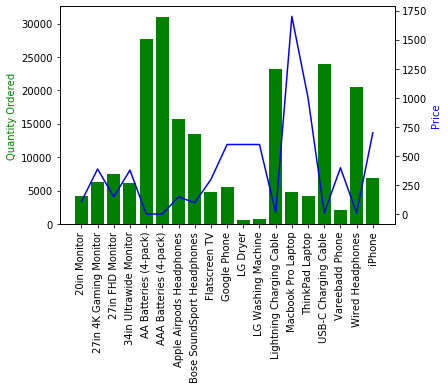

In [26]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(groups.index, groups, color='g')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax2.plot(prices.index, prices, 'b-')
ax1.set_xticklabels(groups.index, rotation='vertical')
plt.show()

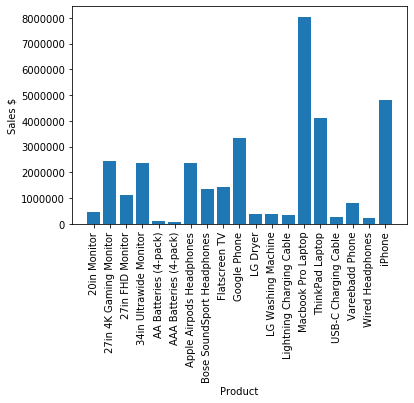

Macbook Pro Laptop


In [27]:
# Above we see cheap products that sell a lot and expensive products that sell less.
# What product brings the most sales in total?
sales = data.groupby('Product')['Sales'].sum()
plt.bar(sales.index, sales)
plt.xticks(groups.index, rotation='vertical')
plt.ylabel('Sales $')
plt.xlabel('Product')
plt.show()
print(sales.idxmax())

In [28]:
%pwd

'D:\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis'